In [15]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score


In [16]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3aa3c4da03ff4732a81e56a3b678da70 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='grLB7-TuYRnbrDecUugCTYOnpq_rLThfAshhTOKIbYdO',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_3aa3c4da03ff4732a81e56a3b678da70.get_object(Bucket='lifeexpectancymodel-donotdelete-pr-2eeplhknxjt33d',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.

life_exp_data= pd.read_csv(body)
life_exp_data.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness _1-19 years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [17]:
life_exp_data=life_exp_data.drop('Year',axis=1)
life_exp_data=life_exp_data.drop(['Country'],axis=1)

In [5]:
status_types=["Developing","Developed"]
label_churn=pd.DataFrame(life_exp_data,columns=["Status"]);
label_encoder=LabelEncoder();
label=life_exp_data["Status"]
life_exp_data["Status"]=label_encoder.fit_transform(label);


In [5]:
life_exp_data.head().shape

(5, 19)

In [6]:
categorical_Columns=life_exp_data.select_dtypes(include=[np.object]).columns
print(categorical_Columns)

imput_categorical=SimpleImputer(strategy='mean');

onehot_categorical=OneHotEncoder(handle_unknown='ignore');

categorical_transformer=Pipeline(steps=[('impute',imput_categorical),('onehot',onehot_categorical)]);


Index([], dtype='object')


In [7]:

numerical_Columns=[col for col in life_exp_data.select_dtypes(include=[np.double,np.float,np.int]).columns if col not in ['Life_expectancy ']]
print(numerical_Columns)

num_scaler=StandardScaler()

numerical_transformer=Pipeline(steps=[('scaler',num_scaler)])

['Status', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', ' BMI', 'Polio', 'Total_expenditure', 'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', ' thinness _1-19 years', ' thinness_5-9_years', 'Income_composition_of_resources', 'Schooling']


In [8]:
preprocessorForCategoricalColumns= ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_Columns)],
                                            remainder="passthrough")
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_Columns),('num',numerical_transformer,numerical_Columns)],
                                            remainder="passthrough")
pre_temp=preprocessorForCategoricalColumns.fit_transform(life_exp_data)
print(pre_temp)
pre_temp1=preprocessorForAllColumns.fit_transform(life_exp_data)
print(pre_temp1)



[[1.00e+00 6.50e+01 2.63e+02 ... 1.73e+01 4.79e-01 1.01e+01]
 [1.00e+00 5.99e+01 2.71e+02 ... 1.75e+01 4.76e-01 1.00e+01]
 [1.00e+00 5.99e+01 2.68e+02 ... 1.77e+01 4.70e-01 9.90e+00]
 ...
 [1.00e+00 4.48e+01 7.30e+01 ... 1.30e+00 4.27e-01 1.00e+01]
 [1.00e+00 4.53e+01 6.86e+02 ... 1.70e+00 4.27e-01 9.80e+00]
 [1.00e+00 4.60e+01 6.65e+02 ... 1.12e+01 4.34e-01 9.80e+00]]
[[ 4.59398510e-01  7.90238016e-01  2.68823775e-01 ... -7.04482560e-01
  -5.63613925e-01  6.50000000e+01]
 [ 4.59398510e-01  8.54613530e-01  2.85786378e-01 ... -7.18709639e-01
  -5.93390768e-01  5.99000000e+01]
 [ 4.59398510e-01  8.30472712e-01  3.02748982e-01 ... -7.47163796e-01
  -6.23167610e-01  5.99000000e+01]
 ...
 [ 4.59398510e-01 -7.38680441e-01 -4.49843850e-02 ... -9.51085257e-01
  -5.93390768e-01  4.48000000e+01]
 [ 4.59398510e-01  4.19409332e+00 -4.49843850e-02 ... -9.51085257e-01
  -6.52944452e-01  4.53000000e+01]
 [ 4.59398510e-01  4.02510759e+00 -5.34656867e-02 ... -9.17888740e-01
  -6.52944452e-01  4.6000000

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
features = []
features = life_exp_data.drop(['Life_expectancy '], axis=1)

label = pd.DataFrame(life_exp_data, columns = ['Life_expectancy ']) 
label = life_exp_data['Life_expectancy ']


In [10]:
corr_matrix = life_exp_data.corr()
corr_matrix['Life_expectancy '].sort_values(ascending=False)


Life_expectancy                    1.000000
Schooling                          0.751975
Income_composition_of_resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total_expenditure                  0.218086
Population                        -0.021538
Measles                           -0.157586
infant_deaths                     -0.196557
 thinness_5-9_years               -0.471584
 thinness _1-19 years             -0.477183
Status                            -0.482136
 HIV/AIDS                         -0.556556
Adult_Mortality                   -0.696359
Name: Life_expectancy , dtype: float64

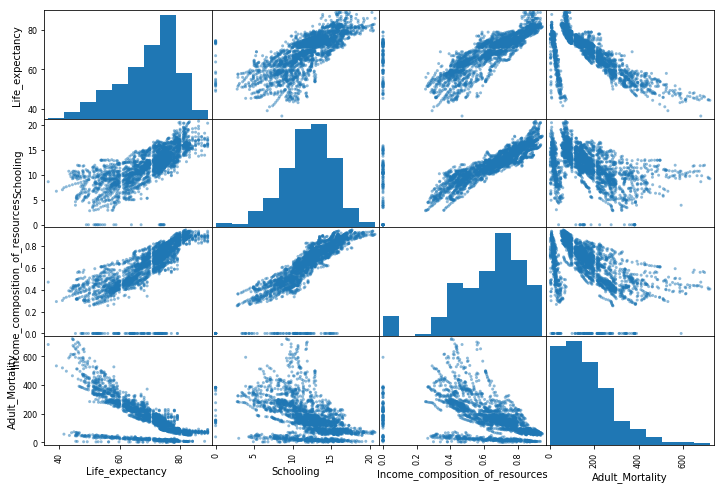

In [11]:
attributes=['Life_expectancy ','Schooling','Income_composition_of_resources','Adult_Mortality']
scatter_matrix(life_exp_data[attributes],figsize=(12,8));

In [12]:
features.fillna(value = features.mean(), inplace = True)
label.fillna(value = label.mean(), inplace = True)

In [10]:

X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=42);

NameError: name 'features' is not defined

In [14]:
print(f"records in the test set are :{len(X_train)} \n records in the test set are :{len(X_test)}")
print(X_train.head()) 

records in the test set are :2350 
 records in the test set are :588
      Status  Adult_Mortality  infant_deaths  Alcohol  percentage expenditure  \
456        1            126.0              0     5.28              345.463714   
462        1            152.0              0     3.81              150.743486   
2172       1            143.0              0    10.43                0.000000   
2667       1             13.0              3     1.29              594.645310   
381        1             95.0              0     0.13              941.703687   

      Hepatitis B  Measles   BMI  Polio  Total_expenditure  Diphtheria  \
456     96.000000        0  25.5   98.0               4.30        98.0   
462     80.940461        0  22.1   91.0               5.19         9.0   
2172    99.000000        0  44.5   99.0               7.58        99.0   
2667    98.000000       16  59.3   98.0               7.26        98.0   
381     99.000000        0  28.0   99.0               3.40        94.0   


In [17]:
#life_exp_data['Status'].value_counts()

#X_test.fillna(X_test.mean())

#X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(features,label , random_state=0)

#print("Dimensions of datasets that will be used for training : Input features"+str(X_train_slr.shape)+ 
 #     " Output label" + str(y_train_slr.shape))

#print("Dimensions of datasets that will be used for testing : Input features"+str(X_test_slr.shape)+ 
  #    " Output label" + str(y_test_slr.shape))

#life_exp_data.describe()



Dimensions of datasets that will be used for training : Input features(2203, 18) Output label(2203,)
Dimensions of datasets that will be used for testing : Input features(735, 18) Output label(735,)


In [12]:
def model_metrics(regressor,y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared error: %.2f"
      % mse)
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2 )
    return [mse, r2]


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

model_name = 'Random Forest Regression'

slRegressor = RandomForestRegressor()

slRegressor.fit(X_train,y_train)

y_pred_slr= slRegressor.predict(X_test)

print(slRegressor)

NameError: name 'X_train' is not defined

In [13]:
predictions = slRegressor.predict(X_test)
#life_exp_data.head()

NameError: name 'slRegressor' is not defined

In [8]:
plt.scatter(y_test,predictions)

NameError: name 'y_test' is not defined

In [24]:
print(f"Score :{slRegressor.score(X_test,y_test)}")
slrMetrics = model_metrics(slRegressor,y_test,y_pred_slr)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Score :0.9820365355002162
Mean squared error: 4.32
R2 score: 0.95
RMSE: 1.2475053992489311


In [ ]:
#!pip install watson-machine-learning-client


In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [ ]:
wml_credentials={
  "apikey": "XQZfJcTXchdfJHeyCKGXpl28D7OWaZBVOg1WMfrMokYj",
  "apikey_name": "Service credentials-1",
  "instance_id": "5344ac7d-15a6-4e4c-a3ed-ac28bc2e84ac",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [ ]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [ ]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Sandy", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "sandysawarkar20@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Life_expectancy"}

In [ ]:
model_artifact =client.repository.store_model(slRegressor, meta_props=model_props)

In [ ]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [ ]:
published_model_uid

In [ ]:
deployment = client.deployments.create(published_model_uid, name="Life_expectancy")

In [ ]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [ ]:
scoring_endpoint